In [60]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split

from prepare import train_validate_test_split
import prepare

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix


In [2]:
df = prepare.get_animal_data()

In [3]:
df.head()

,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
Animal ID,,,,,,,,,,,
A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
A674754,NaN,03/18/2014 11:47:00 AM,Mar 2014,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


In [34]:
df.Color.value_counts()

Black/White                14895
Black                      11958
Brown Tabby                 8258
Brown                       6056
White                       5014
                           ...  
Chocolate/Gold                 1
Torbie/Calico                  1
Orange/Gray                    1
Cream Tabby/Cream Tabby        1
Black Tabby/Brown              1
Name: Color, Length: 621, dtype: int64

In [4]:
df = prepare.prep_animal_data(df)

In [5]:
df.head()

,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,Color,...,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
Animal ID,,,,,,,,,,,,,,,,,,,,,
A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,2017-05-02,Rto-Adopt,Cat,Neutered Male,5,Domestic Shorthair Mix,Brown Tabby/White,...,0,1,0,0,0,0,0,1,0,0
A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,2017-07-12,Adoption,Dog,Neutered Male,5,Chihuahua Shorthair Mix,White/Brown,...,0,0,1,0,0,0,0,1,0,0
A821648,No_name,08/16/2020 11:38:00 AM,Aug 2020,2019-08-16,Euthanasia,Other,Unknown,3,Raccoon,Gray,...,0,0,0,0,1,0,0,0,0,1
A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,2015-10-08,Adoption,Dog,Neutered Male,7,Anatol Shepherd/Labrador Retriever,Buff,...,0,0,1,0,0,0,0,1,0,0
A674754,No_name,03/18/2014 11:47:00 AM,Mar 2014,2014-03-12,Transfer,Cat,Intact Male,8,Domestic Shorthair Mix,Orange Tabby,...,0,1,0,0,0,0,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142750 entries, A794011 to A857750
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Name                   142750 non-null  object        
 1   DateTime               142750 non-null  object        
 2   MonthYear              142750 non-null  object        
 3   DOB                    142750 non-null  datetime64[ns]
 4   outcome                142750 non-null  object        
 5   animal_type            142750 non-null  object        
 6   sex                    142750 non-null  object        
 7   age                    142750 non-null  int64         
 8   Breed                  142750 non-null  object        
 9   Color                  142750 non-null  object        
 10  year                   142750 non-null  int64         
 11  age_bin                140392 non-null  category      
 12  Adoption               142750 non-null  ui

In [ ]:
prepare.prep_animal_data(df)

In [9]:
train, validate, test = train_validate_test_split(df, target='Euthanasia')
train.shape, validate.shape, test.shape

((79940, 33), (34260, 33), (28550, 33))

Initial questions 

- what sex of animals is more likely to get euthi

- what animal type is more lkely to get euthi

- Does the age of the animal determine the euthinization

- what age are animals more likly to get adopted?

- what Breed is more likly to get adopted 



-  Some notes from the rubric :
You should ask questions of the data using natural language that speaks to the business stakeholders in markdown cells, ideally a header prior to the visualization or statistical test, that you then explore. 

3+ Statistical tests are utilized correctly (correct variables, conclusions drawn, no assumptions violated, and proper conclusions reached)

You may only call out a few of these features in the presentation, but having that there for reference is important in a report. A group of features may have the same reason why, and those can be mentioned together.

## Question 1 what animal type of animals is more likely to get euthi

<Figure size 1080x720 with 0 Axes>

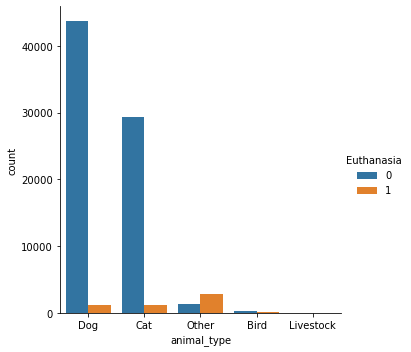

In [12]:
plt.figure(figsize=(15,10))
sns.catplot(x="animal_type",hue = 'Euthanasia', data=train, kind='count')

$H_o$ : Animal_type and Euthanasia are independant

$H_a$ : There is a relationship between the animal type and Euthinasia

In [16]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.animal_type, train.Euthanasia)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
   

Reject the null hypothesis


## Question 1.2 What animal type is more likely to get adopted?

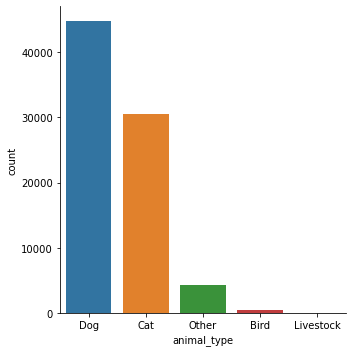

In [14]:
sns.catplot(x="animal_type", data=train, kind='count')

In [15]:
df.animal_type.value_counts()

Dog          80072
Cat          54430
Other         7542
Bird           680
Livestock       26
Name: animal_type, dtype: int64

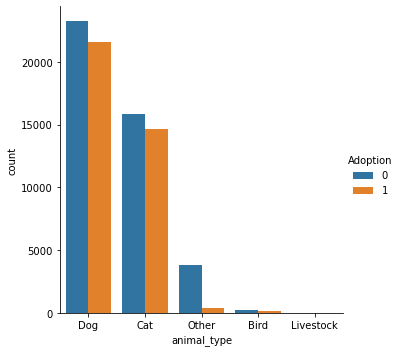

In [13]:
sns.catplot(x="animal_type",hue = 'Adoption', data=train, kind='count')

<Figure size 864x648 with 0 Axes>

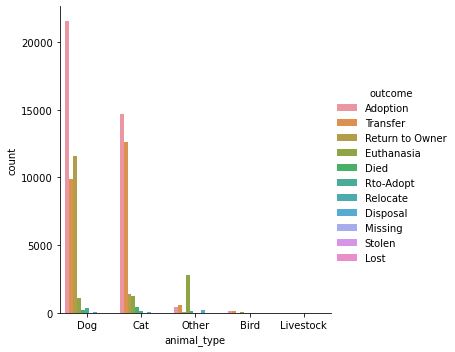

In [17]:
plt.figure(figsize=(12,9))
sns.catplot(x="animal_type",hue = 'outcome', data=train, kind='count')

## QUESTION 2 what sex of animals is more likely to get euthi

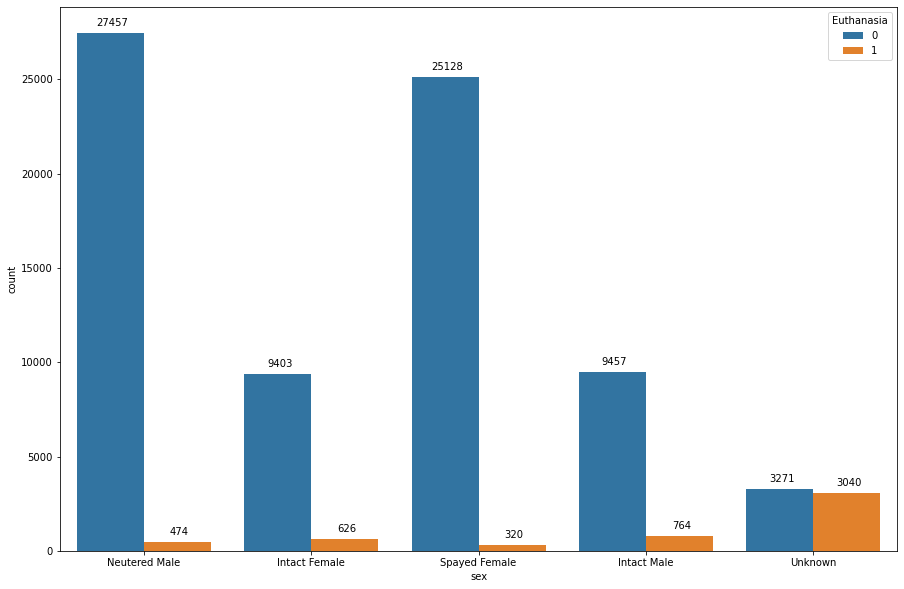

In [18]:
plt.figure(figsize=(15,10))
c = sns.countplot(train['sex'],hue=train['Euthanasia'])

for p in c.patches:
    c.annotate(p.get_height(), 
                (p.get_x() + p.get_width() / 2.0, 
                 p.get_height()), 
                 ha = 'center', 
                 va = 'center', 
                 xytext = (2, 10),
                 textcoords = 'offset points')

$H_o$ : Sex and Euthanasia are independant

$H_a$ : There is a relationship between the animal sex and Euthinasia

In [23]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.sex, train.Euthanasia)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
   

Reject the null hypothesis


##  Question 3 - are the ages of the animals who are euthanized than those animals who are not euthanized 

<AxesSubplot:xlabel='age', ylabel='count'>

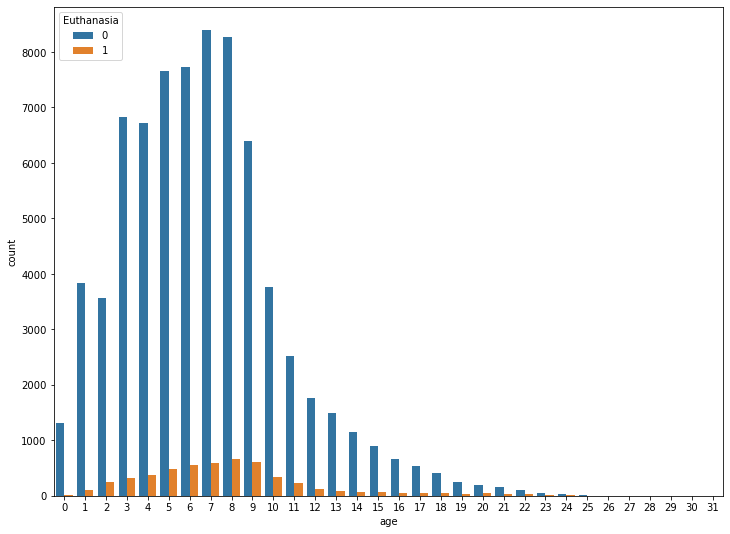

In [19]:
plt.figure(figsize=(12,9))
sns.countplot(x = train['age'] ,hue=train['Euthanasia'])

$H_o$ : the ages of the animals who are euthanized are equal to the ages of the animals that are not euthanized 

$H_a$ : the ages of the animals who are euthanized are not equal to the ages of the animals that are not euthanized

In [26]:
Euthanasia_sample = train[train.Euthanasia == 1 ].age
No_Euthanasia_sample = train[train.Euthanasia == 0 ].age

In [27]:
alpha = 0.05
#For this I did a T-statistical test becasue we are working with a categorical variable and a quatative variable 

t, p = stats.ttest_ind(Euthanasia_sample,No_Euthanasia_sample, equal_var=False)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


# question 4 - what are the diffrent outcomes for certain animal types

<AxesSubplot:xlabel='outcome', ylabel='count'>

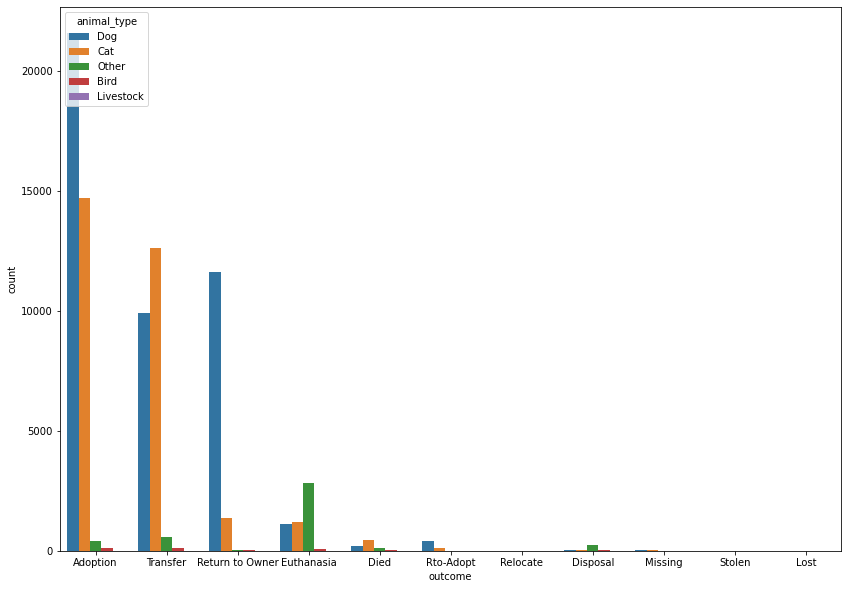

In [20]:
plt.figure(figsize=(14,10))
sns.countplot(x = train['outcome'] ,hue=train['animal_type'])

$H_o$ : animal type and outcome are independant

$H_a$ : There is a relationship between the animal type and independntn

In [30]:
# Chi sQARED TEST 

# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
# Setup a crosstab of observed churn and payment_type 
#This is the best statistical test becasue we are looking at two categorical variables 
observed = pd.crosstab(train.outcome, train.animal_type)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null")
   

Reject the null hypothesis


# Modeling

Notes from the rubrick 


- You clearly communicate how you evaluated and compared models. What metric(s) did you use and why? For example, in one case, you may decide to use precision over accuracy.

## creating a baseline

In [32]:
baseline_accuracy = (train.Euthanasia == 0).mean()
print(f"baseline_accuracy: {round(baseline_accuracy, 2)}")

baseline_accuracy: 0.93


In [33]:
train.head()

,Name,DateTime,MonthYear,DOB,outcome,animal_type,sex,age,Breed,Color,...,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
Animal ID,,,,,,,,,,,,,,,,,,,,,
A731965,*Elmer,10/26/2016 12:00:00 AM,Oct 2016,2013-07-30,Adoption,Dog,Neutered Male,9,Pit Bull Mix,Blue/White,...,0,0,1,0,0,0,0,1,0,0
A817802,No_name,06/01/2020 03:26:00 PM,Jun 2020,2019-05-26,Transfer,Dog,Neutered Male,3,Dachshund/Chihuahua Shorthair,Black,...,0,0,1,0,0,0,0,1,0,0
A811391,Holly,01/03/2020 01:08:00 PM,Jan 2020,2011-01-03,Return to Owner,Dog,Intact Female,11,Boxer,White,...,0,0,1,0,0,1,0,0,0,0
A692819,Spider,03/22/2016 12:56:00 PM,Mar 2016,2012-11-26,Euthanasia,Dog,Neutered Male,10,American Staffordshire Terrier Mix,Black/White,...,0,0,1,0,0,0,0,1,0,0
A704896,Drogo,06/16/2015 04:59:00 PM,Jun 2015,2013-06-10,Adoption,Dog,Neutered Male,9,Chihuahua Shorthair Mix,Brown/White,...,0,0,1,0,0,0,0,1,0,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142750 entries, A794011 to A857750
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Name                   142750 non-null  object        
 1   DateTime               142750 non-null  object        
 2   MonthYear              142750 non-null  object        
 3   DOB                    142750 non-null  datetime64[ns]
 4   outcome                142750 non-null  object        
 5   animal_type            142750 non-null  object        
 6   sex                    142750 non-null  object        
 7   age                    142750 non-null  int64         
 8   Breed                  142750 non-null  object        
 9   Color                  142750 non-null  object        
 10  year                   142750 non-null  int64         
 11  age_bin                140392 non-null  category      
 12  Adoption               142750 non-null  ui

## Decision Tree 

In [68]:
X_train = train.drop(columns=['Name','DateTime','MonthYear','DOB', 'Color','Breed', 'age_bin', 'outcome','animal_type','sex','Euthanasia', 'Adoption', 'Died', 'Disposal', 'Lost', 'Missing', 'Relocate', 'Return to Owner', 'Rto-Adopt','Stolen','Transfer'])
y_train = train[['Euthanasia']]

X_validate = validate.drop(columns=['Name','DateTime','MonthYear','DOB', 'Color','Breed', 'age_bin','outcome','animal_type','sex','Euthanasia', 'Adoption', 'Died', 'Disposal', 'Lost', 'Missing', 'Relocate', 'Return to Owner', 'Rto-Adopt','Stolen','Transfer'])
y_validate = validate[['Euthanasia']]

X_test = test.drop(columns=['Name','DateTime','MonthYear','DOB', 'Color','Breed', 'age_bin','outcome','animal_type','sex','Euthanasia', 'Adoption', 'Died', 'Disposal', 'Lost', 'Missing', 'Relocate', 'Return to Owner', 'Rto-Adopt','Stolen', 'Transfer'])
y_test = test[['Euthanasia']]

In [69]:
X_train.head()

,age,year,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,sex_Intact Female,sex_Intact Male,sex_Neutered Male,sex_Spayed Female,sex_Unknown
Animal ID,,,,,,,,,,,,
A731965,9,2013,0,0,1,0,0,0,0,1,0,0
A817802,3,2019,0,0,1,0,0,0,0,1,0,0
A811391,11,2011,0,0,1,0,0,1,0,0,0,0
A692819,10,2012,0,0,1,0,0,0,0,1,0,0
A704896,9,2013,0,0,1,0,0,0,0,1,0,0


In [70]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=123)

In [71]:
tree1 = tree1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = tree1.predict(X_train)

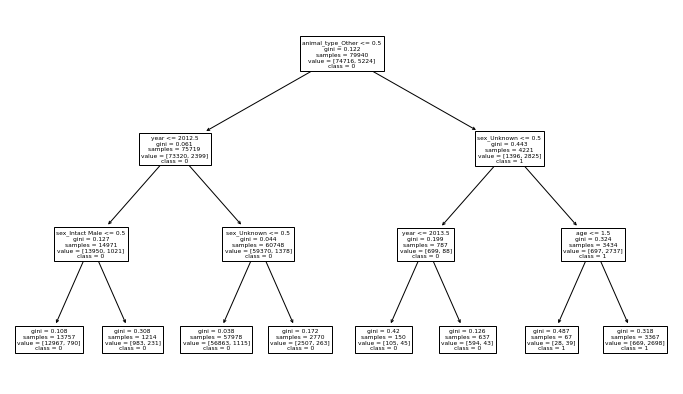

In [72]:
plt.figure(figsize=(12, 7))
plot_tree(tree1, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

In [73]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(tree1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.96


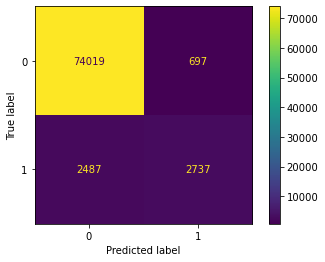

In [74]:
plot_confusion_matrix(tree1, X_train, y_train)

In [75]:
print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     74716
           1       0.80      0.52      0.63      5224

    accuracy                           0.96     79940
   macro avg       0.88      0.76      0.81     79940
weighted avg       0.96      0.96      0.96     79940



In [64]:
# Let's get loopy
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                      0            1  accuracy     macro avg  weighted avg
precision      0.968317     0.669273  0.952527      0.818795      0.948775
recall         0.981316     0.540773  0.952527      0.761045      0.952527
f1-score       0.974773     0.598200  0.952527      0.786487      0.950164
support    74716.000000  5224.000000  0.952527  79940.000000  79940.000000

Tree with max depth of 2
                      0            1  accuracy     macro avg  weighted avg
precision      0.967493     0.797030   0.96017      0.882261      0.956353
recall         0.990671     0.523928   0.96017      0.757300      0.960170
f1-score       0.978945     0.632248   0.96017      0.805596      0.956289
support    74716.000000  5224.000000   0.96017  79940.000000  79940.000000

Tree with max depth of 3
                      0            1  accuracy     macro avg  weighted avg
precision      0.967614     0.869441  0.963748      0.918527      0.961198
recall         0.994499

In [65]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.952527,0.953327,-0.000801
1,2,0.960170,0.960158,0.000013
2,3,0.963748,0.963310,0.000438
3,4,0.981111,0.981524,-0.000413
4,5,0.990731,0.990630,0.000100
5,6,0.997661,0.998044,-0.000384
6,7,0.999212,0.999241,-0.000029
7,8,0.999825,0.999825,0.000000
8,9,0.999975,0.999942,0.000033
9,10,0.999987,0.999942,0.000046


## Random forest